In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
from google.colab import files

In [ ]:
# Upload semua dataset yang dipakai
uploaded = files.upload()

Saving package_tourism.csv to package_tourism.csv
Saving tourism_rating.csv to tourism_rating.csv
Saving tourism_with_id.csv to tourism_with_id.csv
Saving user_new.csv to user_new.csv


In [ ]:
# Menyimpan masing-masing dataset kedalam variabel

rating = pd.read_csv('tourism_rating.csv')
place = pd.read_csv('tourism_with_id.csv')
user = pd.read_csv('user_new.csv')

In [ ]:
# Melihat gambaran data place

place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [ ]:
# Membuang kolom yang tidak dipakai

place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


In [ ]:
# Mencari data yang hanya ada di Kota Bandung

place = place[place['City']=='Bandung']
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,NaN,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781
211,212,Jalan Braga,Jalan Braga adalah nama sebuah jalan utama di ...,Budaya,Bandung,0,4.7,NaN,"{'lat': -6.9150534, 'lng': 107.6089842}",-6.915053,107.608984


In [ ]:
# Cek info dari DataFrame place
place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 210 to 333
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      124 non-null    int64  
 1   Place_Name    124 non-null    object 
 2   Description   124 non-null    object 
 3   Category      124 non-null    object 
 4   City          124 non-null    object 
 5   Price         124 non-null    int64  
 6   Rating        124 non-null    float64
 7   Time_Minutes  50 non-null     float64
 8   Coordinate    124 non-null    object 
 9   Lat           124 non-null    float64
 10  Long          124 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.6+ KB


In [ ]:
# Membuang kolom yang tidak dipakai

place = place.drop('Time_Minutes', axis=1)

In [ ]:
# Cek info dari DataFrame rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
# Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Bandung

rating = pd.merge(rating, place[['Place_Id','Category','Rating']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings,Category,Rating
0,9,211,3,Cagar Alam,4.5
1,26,211,2,Cagar Alam,4.5
2,40,211,3,Cagar Alam,4.5
3,40,211,2,Cagar Alam,4.5
4,70,211,5,Cagar Alam,4.5


In [ ]:
# Melihat ukuran dataset rating untuk Kota Bandung

rating.shape

(2842, 5)

In [ ]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Bandung

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')

In [ ]:

# Melakukan merge antara df user dan rating untuk mendapatkan kolom Age
new = pd.merge(user[['User_Id','Age']], rating, how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
new.head(20)

,User_Id,Age,Place_Id,Place_Ratings,Category,Rating
2675,1,20,328,2,Cagar Alam,4.5
2185,1,20,307,4,Cagar Alam,4.4
1831,1,20,292,3,Cagar Alam,4.6
2082,1,20,302,2,Tempat Ibadah,4.7
2297,1,20,312,2,Cagar Alam,4.5
1241,1,20,265,5,Budaya,4.4
1078,1,20,258,5,Budaya,4.6
260,1,20,222,3,Budaya,4.6
795,1,20,246,4,Cagar Alam,4.4
2505,2,21,321,3,Taman Hiburan,4.4


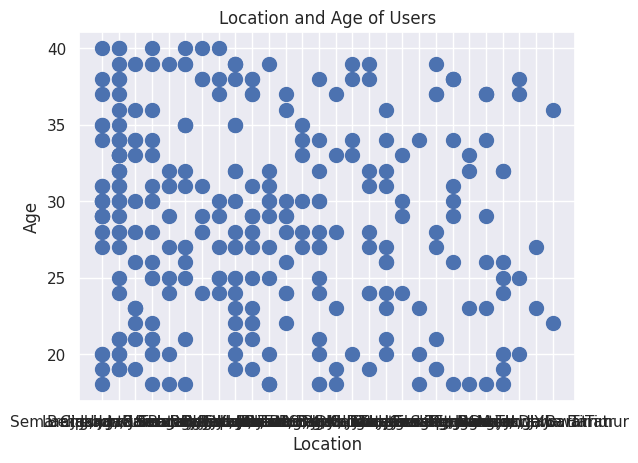

In [ ]:
# Ploting untuk mengecek hubungan lokasi dan usia
fig, ax = plt.subplots()

# Plot the location and age of the users
ax.scatter(user['Location'], user['Age'], s=100)

# Add a title and labels to the plot
ax.set_title('Location and Age of Users')
ax.set_xlabel('Location')
ax.set_ylabel('Age')

# Show the plot
plt.show()

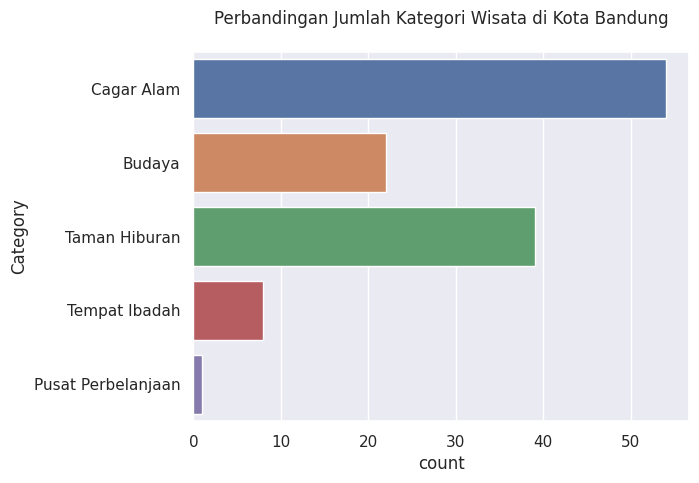

In [ ]:
# Membuat visualisasi jumlah kategori wisata di Kota Bandung

sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

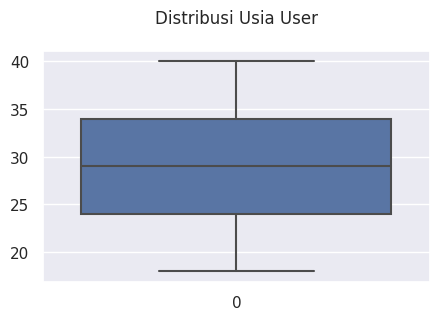

In [ ]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

In [ ]:
# Membaca dataset untuk dilakukan encoding

df = new.copy()
df.head()

,User_Id,Age,Place_Id,Place_Ratings,Category,Rating
2675,1,20,328,2,Cagar Alam,4.5
2185,1,20,307,4,Cagar Alam,4.4
1831,1,20,292,3,Cagar Alam,4.6
2082,1,20,302,2,Tempat Ibadah,4.7
2297,1,20,312,2,Cagar Alam,4.5


In [ ]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [ ]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [ ]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [ ]:
# Encoding Category
category_to_category_encoded, category_encoded_to_category = dict_encoder('Category')

# Mapping Place_Id ke dataframe place
df['category_new'] = df['Category'].map(category_to_category_encoded)

In [ ]:
# Encoding Age
age_to_age_encoded, age_encoded_to_age = dict_encoder('Age')

# Mapping Place_Id ke dataframe place
df['age_new'] = df['Age'].map(age_to_age_encoded)

In [ ]:
# Mendapatkan jumlah user dan place
num_users, num_place, num_ages, num_category = len(user_to_user_encoded), len(place_to_place_encoded), len(age_to_age_encoded), len(category_to_category_encoded)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Number of Age:{num_ages}, Number of Category: {num_category} Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 124, Number of Age:23, Number of Category: 5 Min Rating: 1.0, Max Rating: 5.0


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(32)

,User_Id,Age,Place_Id,Place_Ratings,Category,Rating,user,place,category_new,age_new
1638,117,30,282,3.0,Cagar Alam,4.0,116,107,0,11
129,267,31,216,4.0,Taman Hiburan,4.4,266,106,3,10
2830,158,23,334,3.0,Taman Hiburan,4.5,157,31,3,2
1883,154,31,294,3.0,Budaya,4.3,153,22,2,10
1412,119,25,272,2.0,Budaya,4.3,118,83,2,12
1197,30,30,263,2.0,Cagar Alam,4.1,29,100,0,11
2574,145,37,323,3.0,Cagar Alam,4.9,144,90,0,7
2782,150,40,332,5.0,Cagar Alam,4.6,149,81,0,5
223,200,34,220,5.0,Taman Hiburan,4.5,199,115,3,9
1739,113,38,287,5.0,Taman Hiburan,4.4,112,113,3,6


In [ ]:
# Membuat variabel x untuk memprediksi kategori
x = df[['age_new']].values

# Membuat variabel y untuk membuat probabilitas kategori 
y = df['category_new'].values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
# Melakukan encode untuk kategori pada tahap train dan test
y_train_encoded = keras.utils.to_categorical(y_train, num_category)
y_val_encoded = keras.utils.to_categorical(y_val, num_category)
y_train_encoded
y_val_encoded

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Membuat model
def create_model(num_category):
    model = keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(num_category, activation='softmax'))  
    return model

In [ ]:
# Menginisialisasi model
model = create_model(num_category)

# Mengompilasi model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9), loss='categorical_crossentropy', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Membuat Callback 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train_encoded,
    epochs = 100,
    validation_data = (x_val, y_val_encoded),
    callbacks = [myCallback()]
)

Epoch 1/100
71/71 [==============================] - 1s 6ms/step - loss: 1.8395 - root_mean_squared_error: 0.4234 - val_loss: 1.8040 - val_root_mean_squared_error: 0.4200
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 1.7754 - root_mean_squared_error: 0.4171 - val_loss: 1.7463 - val_root_mean_squared_error: 0.4142
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 1.7276 - root_mean_squared_error: 0.4122 - val_loss: 1.7104 - val_root_mean_squared_error: 0.4105
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 1.7012 - root_mean_squared_error: 0.4095 - val_loss: 1.6892 - val_root_mean_squared_error: 0.4082
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 1.6768 - root_mean_squared_error: 0.4068 - val_loss: 1.6600 - val_root_mean_squared_error: 0.4051
Epoch 6/100
71/71 [==============================] - 0s 3ms/step - loss: 1.6474 - root_mean_squared_error: 0.4036 - val_loss: 1.6329 - val_root_m

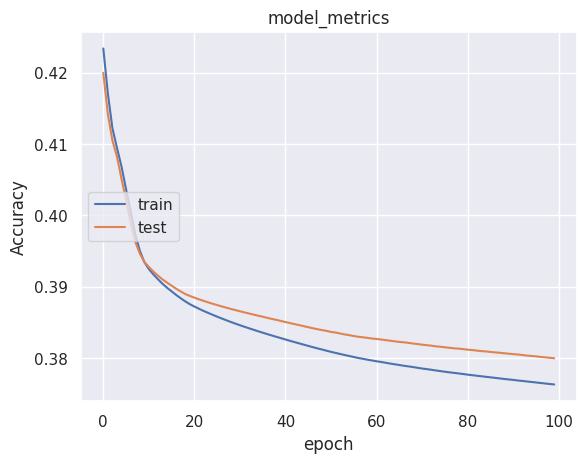

In [ ]:
# Menampilkan plot RMSE test dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
# plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

In [ ]:
# Menyiapkan dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']

In [ ]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
user_id

173

In [ ]:
# Mencari umur dari user
user_age = df.loc[df['User_Id'] == user_id]
user_age = user_age['Age'].values[1]
user_age

29

In [ ]:
# Melakukan prediksi dari usia user
category_recomm = model.predict([[user_age]]).flatten()
print(category_recomm)

1/1 [==============================] - 0s 108ms/step
[9.2044824e-01 2.0413830e-04 9.4927836e-04 7.8156419e-02 2.4203537e-04]
[9.2790133e-06 2.4203537e-05 2.4340470e-05 9.7695524e-03 1.7045338e-02]
0 3 2
Cagar Alam Taman Hiburan Budaya


'  289  298  312  323  268  327  225  221  290'

In [ ]:
# Mendapatkan semua tempat dari masing - masing kategori
category1 = place_df[place_df.category == "Cagar Alam"]
category2 = place_df[place_df.category == "Budaya"]
category3 = place_df[place_df.category == "Taman Hiburan"]
category4 = place_df[place_df.category == "Tempat Ibadah"]
category5 = place_df[place_df.category == "Pusat Perbelanjaan"]

# Mencari banyaknya wisatawan yang pergi ke tempat dari masing - masing kategori
category1_df = len(df[df.Category == "Cagar Alam"])
category2_df = len(df[df.Category == "Budaya"])
category3_df = len(df[df.Category == "Taman Hiburan"])
category4_df = len(df[df.Category == "Tempat Ibadah"])
category5_df = len(df[df.Category == "Pusat Perbelanjaan"])

# Memasukan jumlah wisatawan dari setiap kategori ke sebuah array secara berurutan
length_of_category_df = []
length_of_category_df.append(category1_df)
length_of_category_df.append(category2_df)
length_of_category_df.append(category3_df)
length_of_category_df.append(category4_df)
length_of_category_df.append(category5_df)

In [ ]:
# Mencari jumlah dari setiap ketegori
category1_len = len(category1)
category2_len = len(category2)
category3_len = len(category3)
category4_len = len(category4)
category5_len = len(category5)*10

# Memasukan jumlah dari setiap ketegori kedalam array secara berurutan
length_of_category = []
length_of_category.append(category1_len)
length_of_category.append(category2_len)
length_of_category.append(category3_len)
length_of_category.append(category4_len)
length_of_category.append(category5_len)

In [ ]:
# Melakukan normalisasi hasil probabiltas dari setiap ketegori 
for i in range(len(category_recomm)):
  category_recomm[i] = (category_recomm[i])/(length_of_category[i]*1.0)

# Menduplikasi array category_recomm yang berisikan probabilitas dari setiap kategori
category_recomm2 = np.array(category_recomm)

# Mengurutkan  probabilitas dari kecil ke besar
category_recomm2.sort()

In [ ]:
# Mencari 3 ketegori yang memiliki probabilitas terbesar
i=4
highest1 = 0
highest2 = 0
highest3 = 0
while i>=0:
  if category_recomm[i]==category_recomm2[4]:
    highest1 = i
  elif category_recomm[i]==category_recomm2[3]:
    highest2 = i
  elif category_recomm[i]==category_recomm2[2]:
    highest3 = i
  i-=1
print(highest1,highest2,highest3)

In [ ]:
# Mencari nama kategori dari ketiga kategori yang diencode
cat_name1 = category_encoded_to_category.get(highest1)
cat_name2 = category_encoded_to_category.get(highest2)
cat_name3 = category_encoded_to_category.get(highest3)
print(cat_name1,cat_name2,cat_name3)

# Mengambil 4 tempat dari kategori tertinggi
cat1 = place_df[place_df.category == cat_name1]
suggest1 = cat1.sort_values('rating', ascending=False).head(15)
if len(suggest1)>4:
  suggest1 = suggest1.sample(4)
else:
  suggest1 = suggest1.sample(len(suggest1))

# Mengambil 3 tempat dari kategori kedua tertinggi
cat2 = place_df[place_df.category == cat_name2]
suggest2 = cat2.sort_values('rating', ascending=False).head(15)
if len(suggest2)>3:
  suggest2 = suggest2.sample(3)
else:
  suggest2 = suggest2.sample(len(suggest2))

# Mengambil 2 tempat dari kategori ketiga tertinggi
cat3 = place_df[place_df.category == cat_name3]
suggest3 = cat3.sort_values('rating', ascending=False).head(15)
len(suggest3)
if len(suggest3)>2:
  suggest3 = suggest3.sample(2)
else:
  suggest3 = suggest3.sample(len(suggest3))

In [ ]:
# Mencari id dari tempat wisata yang direkomendasikan
final_suggestion = []
for i in range(len(suggest1)):
  final_suggestion.append(suggest1['id'].values[i])

for i in range(len(suggest2)):
  final_suggestion.append(suggest2['id'].values[i])

for i in range(len(suggest3)):
  final_suggestion.append(suggest3['id'].values[i])

In [ ]:
# Mengubah array rekomendasi menjadi string
res = ""
for i in range( len(final_suggestion)):
  res = res + "  " +str(final_suggestion[i])
res